In [1]:
from cats              import notebooknumba as nbnb
from ROOT.gInterpreter import ProcessLine
from cats.cdataframe   import CDataFrame

Welcome to JupyROOT 6.28/10


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import ROOT
import glob

In [12]:
file = 'HV100mmSi_LED_51240116_000000.root'
EventNum = 5

In [19]:
g4dmcHits = CDataFrame('G4SimDir/g4dmcHits', file)
trueEnergy = g4dmcHits.Filter(f'EventNum == {EventNum}').AsNumpy(['trueEnergy'])['trueEnergy']

print(f'The recoil energy in event {EventNum} is {trueEnergy[0]:.3e} eV')

The recoil energy in event 5 is 4.986e+00 eV


In [13]:
g4dmcEvent = CDataFrame('G4SimDir/g4dmcEvent', file)
PhononE = g4dmcEvent.AsNumpy(['PhononE'])['PhononE']

In [16]:
for i in range(len(PhononE[EventNum])):
    print(f'The phonon energy in channel {i} is {PhononE[EventNum][i]:.3e} eV')

print()
print(f'The total phonon energy collected in event {EventNum} is {sum(PhononE[EventNum]):.3e} eV')

The phonon energy in channel 0 is 6.630e+00 eV
The phonon energy in channel 1 is 9.026e+00 eV
The phonon energy in channel 2 is 1.323e+01 eV
The phonon energy in channel 3 is 8.923e+00 eV
The phonon energy in channel 4 is 4.200e+00 eV
The phonon energy in channel 5 is 8.757e+00 eV
The phonon energy in channel 6 is 6.644e+00 eV
The phonon energy in channel 7 is 4.608e+00 eV
The phonon energy in channel 8 is 9.697e+00 eV
The phonon energy in channel 9 is 1.892e+01 eV
The phonon energy in channel 10 is 5.146e+00 eV
The phonon energy in channel 11 is 9.203e+00 eV

The total phonon energy collected in event 5 is 1.050e+02 eV


In [41]:
g4dmcTES = CDataFrame('G4SimDir/g4dmcTES', file)
Trace = g4dmcTES.Filter(f'EventNum == {EventNum}').AsNumpy(['Trace'])['Trace']
Trace = np.array([max(i) - i for i in Trace]) # flip traces right-side up

ChanName = g4dmcTES.Filter(f'EventNum == {EventNum}').AsNumpy(['ChanName'])['ChanName']
T0 = g4dmcTES.Filter(f'EventNum == {EventNum}').AsNumpy(['T0'])['T0'][0]
BinWidth = g4dmcTES.Filter(f'EventNum == {EventNum}').AsNumpy(['BinWidth'])['BinWidth'][0]
TimeBins = np.arange(T0, T0 + BinWidth * len(Trace[0]), BinWidth) * 1e-3 # ns -> us

In [46]:
fig1, axes = plt.subplots(4,3,figsize=(9 * 0.9,8 * 0.9), dpi = 1000)
fig1.set_tight_layout(True)

for plot in range(12):
    currentAxis = axes.flatten()[plot]
    
    currentAxis.plot(TimeBins, Trace[plot], lw=1, color = 'C0', label='TESSim Trace')
    
    currentAxis.set_xlabel(r"Time [$\mathrm{\mu s}$]")
    currentAxis.set_ylabel(r"Amplitude [$\mathrm{\mu A}$]")
    currentAxis.set_title('Trace for ' + ChanName[plot] + ' in Event ' + str(EventNum))
    currentAxis.set_xlim(-100, 1000)

plt.tight_layout()

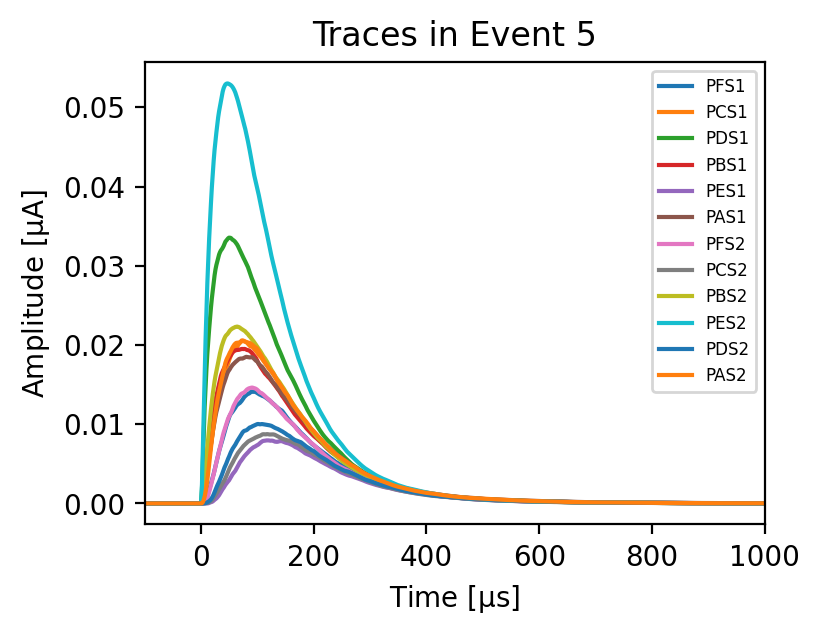

In [50]:
plt.figure(figsize=(4,3), dpi=200)
for i in range(12):
    plt.plot(TimeBins, Trace[i], label = ChanName[i])
plt.xlim(-100, 1000)
plt.xlabel(r"Time [$\mathrm{\mu s}$]")
plt.ylabel(r"Amplitude [$\mathrm{\mu A}$]")
plt.title('Traces in Event ' + str(EventNum))
plt.legend(fontsize = 6)